Pandas

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

np.random.seed(91736482)
df = DataFrame(np.random.randn(500, 4), columns=["V1", "V2", "V3", "V4"])
df.describe()

,V1,V2,V3,V4
count,500.000000,500.000000,500.000000,500.000000
mean,0.044333,0.009873,-0.026111,0.024771
std,0.989134,0.987818,1.056958,1.014426
min,-3.456706,-3.399291,-3.112520,-2.923952
25%,-0.675159,-0.617382,-0.744096,-0.663011
50%,0.068773,-0.016895,-0.027211,0.008867
75%,0.664647,0.693727,0.709340,0.715803
max,3.128487,2.538271,3.262756,3.528537


In [2]:
col = df.V3
col[np.abs(col) > 3]

84   -3.112520
90    3.262756
Name: V3, dtype: float64

In [3]:
df[(np.abs(df) > 3).any(1)]

,V1,V2,V3,V4
74,3.128487,-0.220302,-1.611062,0.143425
84,-0.607007,-0.523714,-3.112520,0.448497
90,0.367416,-1.196249,3.262756,0.071504
131,1.465023,2.299033,0.212082,3.528537
207,1.284202,-3.399291,-0.144366,-1.869674
435,-3.456706,-0.569109,-0.966048,-1.557567


In [4]:
(np.abs(df) > 3).any(0)

V1    True
V2    True
V3    True
V4    True
dtype: bool

In [5]:
df[np.abs(df) > 3] = np.sign(df) * 3
df.describe()

,V1,V2,V3,V4
count,500.000000,500.000000,500.000000,500.000000
mean,0.044990,0.010671,-0.026412,0.023714
std,0.985312,0.985214,1.054736,1.011037
min,-3.000000,-3.000000,-3.000000,-2.923952
25%,-0.675159,-0.617382,-0.744096,-0.663011
50%,0.068773,-0.016895,-0.027211,0.008867
75%,0.664647,0.693727,0.709340,0.715803
max,3.000000,2.538271,3.000000,3.000000


In [6]:
df = DataFrame({"name" : ["k", "l", "b", "c", "k"],
               "sex" : ["m", "f", "m", "f", "m"],
               "home" : ['s', "s", "i", "s", "s"],
               "income" : [250, 195, 325, 210, 274]})
df

,name,sex,home,income
0,k,m,s,250
1,l,f,s,195
2,b,m,i,325
3,c,f,s,210
4,k,m,s,274


In [7]:
sex_dummy = pd.get_dummies(df["sex"])
sex_dummy

,f,m
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1


In [8]:
df.join(sex_dummy)

,name,sex,home,income,f,m
0,k,m,s,250,0,1
1,l,f,s,195,1,0
2,b,m,i,325,0,1
3,c,f,s,210,1,0
4,k,m,s,274,0,1


자료의 시각화

In [99]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
font_name

'Malgun Gothic'

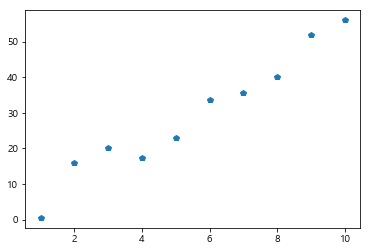

In [10]:
x = np.arange(1,11)
y = x*5 + np.random.randn(10)*5

plt.plot(x, y, "p")
plt.show()

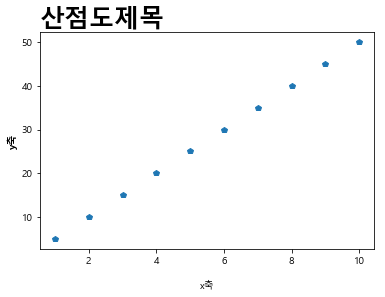

In [11]:
y = x*5

plt.plot(x, y, "p")
plt.title("산점도제목", fontdict={"fontsize" : 25, "fontweight" : "bold"}, loc="left")
plt.xlabel("x축", labelpad=15)
plt.ylabel("y축", fontdict={"fontsize" : 10, "fontweight" : "bold"})
plt.show()

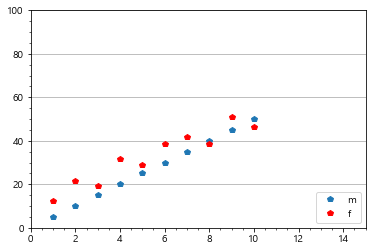

In [12]:
y2 = x*5 + np.random.randn(10)*5 + 5

plt.plot(x, y, "p")
plt.plot(x, y2, "rp")
plt.legend(["m", "f"], loc="lower right")
plt.axis(xmin=0, xmax=15, ymin=0, ymax=100)
plt.minorticks_on()
plt.grid(b=True, which="major", axis="y")
plt.show()

In [75]:
df = pd.read_csv("lecture_data/APTData.csv", header=0, skiprows=7, index_col=None, encoding="utf-8")
df.head(5)

,id,Area,UseDistrict,Option,FAR,Price
0,apt01,도심권,제2종 일반주거지역,풀옵션형,132.72,515.051949
1,apt02,도심권,제2종 일반주거지역,풀옵션형,184.99,499.500499
2,apt03,도심권,상업지역,기본형,308.81,364.319535
3,apt04,도심권,상업지역,풀옵션형,493.08,410.945530
4,apt05,도심권,준주거지역,기본형,349.65,616.975986


In [14]:
area_tbi = pd.value_counts(df["Area"])
area_tbi

동북권    140
동남권     92
서북권     81
서남권     76
도심권     11
Name: Area, dtype: int64

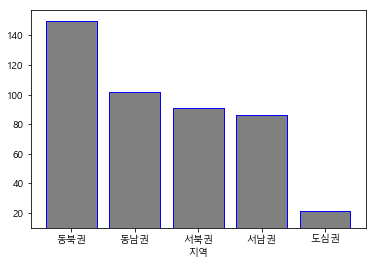

In [15]:
plt.bar(area_tbi.index, area_tbi, bottom=10, color="gray", edgecolor="blue")
plt.xlabel("지역")
plt.show()

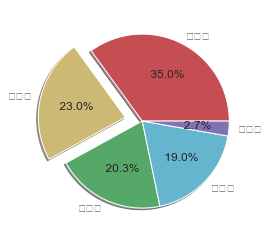

In [98]:
plt.pie(area_tbi, explode=(0, 0.2, 0, 0, 0), labels=area_tbi.index, colors=["r", "y", "g", "c", "m"], autopct="%5.1f%%", shadow=True)
plt.show()

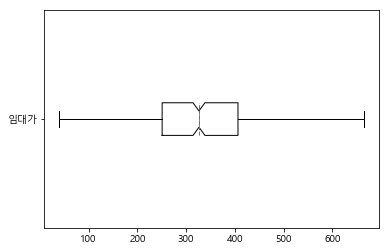

In [17]:
plt.boxplot(df.Price, notch=True, vert=False, meanline=True, whis=3, showmeans=True, labels=["임대가"])
plt.show()

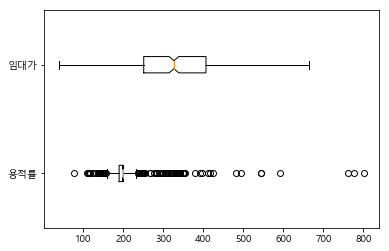

In [18]:
plt.boxplot([df.FAR, df.Price], notch=True, vert=False, whis=3, labels=["용적률", "임대가"])
plt.show()

히스토그램

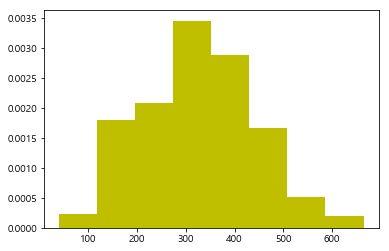

In [26]:
plt.hist(df.Price, bins=8, color="y", density=True)
plt.show()

산점도

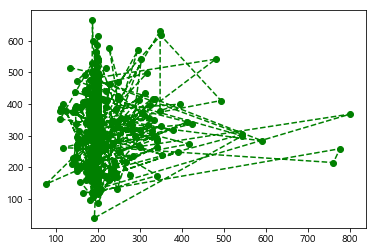

In [27]:
plt.plot(df.FAR, df.Price, color="g", marker="o", linestyle="dashed")
plt.show()

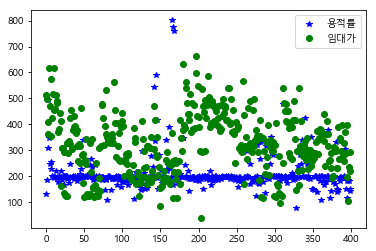

In [28]:
plt.plot(df.FAR, "b*")
plt.plot(df.Price, "go")
plt.legend(["용적률", "임대가"], loc="upper right")
plt.show()

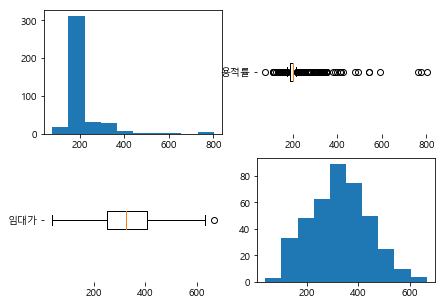

In [29]:
plt.figure(figsize=(7, 5))
plt.subplot(221)

plt.hist(df.FAR, bins=10)
plt.subplot(224)
plt.hist(df.Price, bins=10)
plt.subplot(222, frameon=False)
plt.boxplot(df.FAR, vert=False, labels=["용적률"])
plt.subplot(223, frameon=False)
plt.boxplot(df.Price, vert=False, labels=["임대가"])
plt.show()

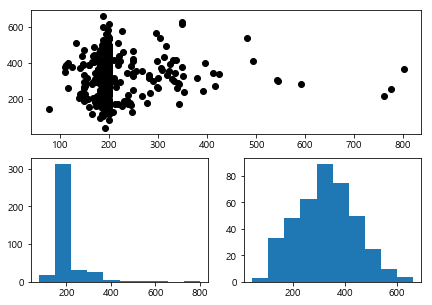

In [45]:
plt.figure(figsize=(7, 5))
plt.subplot(223)
plt.hist(df.FAR, bins=10)
plt.subplot(224)
plt.hist(df.Price, bins=10)
plt.subplot(211)
plt.plot(df.FAR, df.Price, "ko")

plt.show()

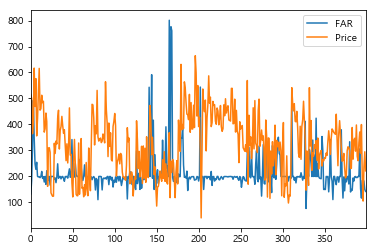

In [46]:
df.plot()

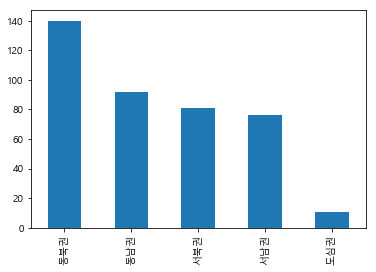

In [47]:
area_tbi = pd.value_counts(df.Area)
area_tbi.plot.bar()

In [48]:
crtab = pd.crosstab(df.Area, df.Option)
crtab

Option,기본형,풀옵션형
Area,,
도심권,4,7
동남권,2,90
동북권,30,110
서남권,26,50
서북권,38,43


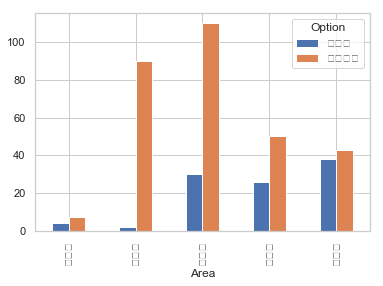

In [97]:
crtab.plot.bar(stacked=False)

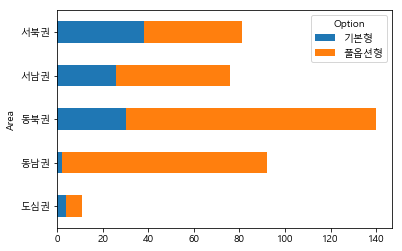

In [54]:
crtab.plot.barh(stacked=True)

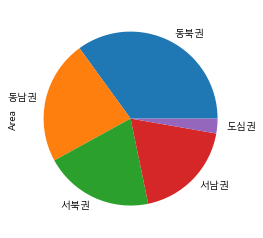

In [55]:
area_tbi.plot.pie()

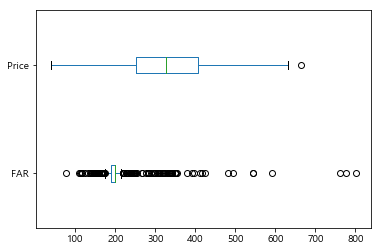

In [56]:
df[["FAR", "Price"]].plot(kind="box", vert=False)

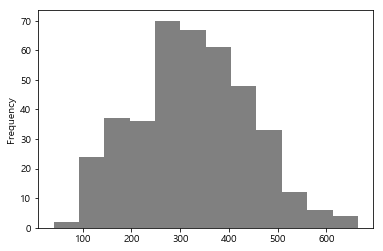

In [59]:
df["Price"].plot(kind="hist", bins=12, color="gray")

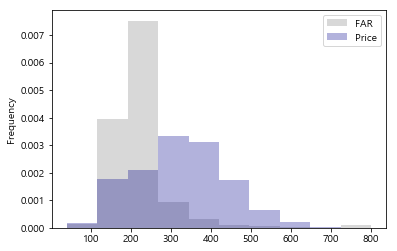

In [76]:
df[["FAR", "Price"]].plot.hist(color=["gray", "darkblue"], density=True, alpha=0.3)

In [82]:
df1 = pd.read_csv("lecture_data/pilot.csv", header=0, skiprows=8, index_col=None, encoding="utf-8")
df1 = df1.replace({"G" : {1 : "엔지니어 수습생", 2 : "파일럿"}})
df1.head()

,G,X1,X2,X3,X4,X5,X6
0,엔지니어 수습생,121,22,74,223,54,254
1,엔지니어 수습생,108,30,80,175,40,300
2,엔지니어 수습생,122,49,87,266,41,223
3,엔지니어 수습생,77,37,66,178,80,209
4,엔지니어 수습생,140,35,71,175,38,261


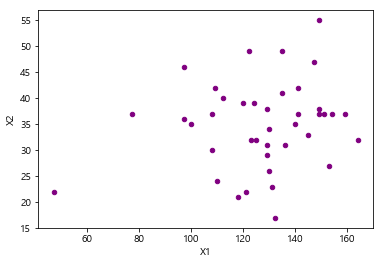

In [83]:
df1.plot.scatter(x="X1", y="X2", color="purple", marker="o")

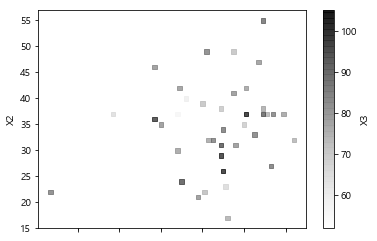

In [84]:
df1.plot.scatter(x="X1", y="X2", c="X3", marker="s", alpha=0.7)

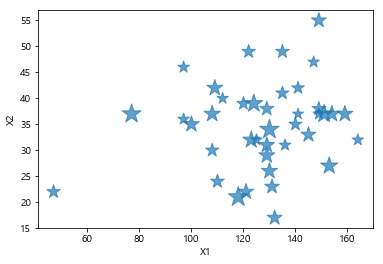

In [86]:
df1.plot.scatter(x="X1", y="X2", s=df1["X5"]*5, marker="*", alpha=0.7)

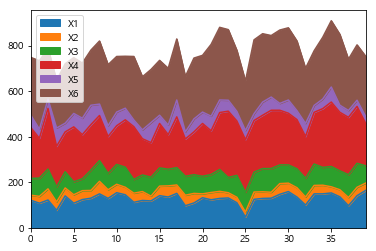

In [87]:
df1.plot.area()

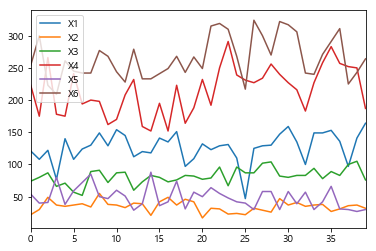

In [88]:
df1.plot.line()

Seaborn

In [91]:
import seaborn as sns

sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

plt.rc("axes", unicode_minus=False)

sns.__version__

'0.9.0'

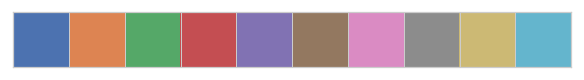

In [90]:
currnt_palette = sns.color_palette()
sns.palplot(currnt_palette)

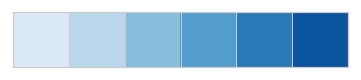

In [93]:
sns.palplot(sns.color_palette("Blues"))

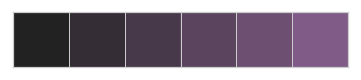

In [94]:
sns.palplot(sns.dark_palette("muted purple", input="xkcd"))

In [95]:
df.head()

,id,Area,UseDistrict,Option,FAR,Price
0,apt01,도심권,제2종 일반주거지역,풀옵션형,132.72,515.051949
1,apt02,도심권,제2종 일반주거지역,풀옵션형,184.99,499.500499
2,apt03,도심권,상업지역,기본형,308.81,364.319535
3,apt04,도심권,상업지역,풀옵션형,493.08,410.945530
4,apt05,도심권,준주거지역,기본형,349.65,616.975986


동북권    140
동남권     92
서북권     81
서남권     76
도심권     11
Name: Area, dtype: int64


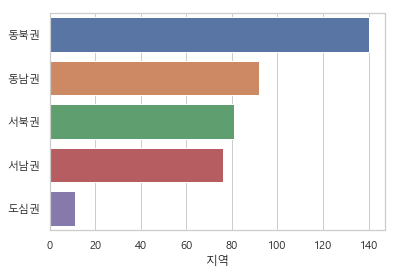

In [100]:
area_tbi = pd.value_counts(df["Area"])
print(area_tbi)
sns.barplot(x=area_tbi, y=area_tbi.index, orient="h")
plt.xlabel("지역")
plt.show()

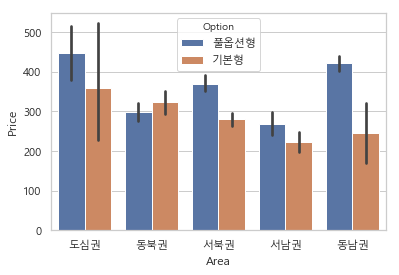

In [101]:
sns.barplot(x="Area", y="Price", hue="Option", data=df)

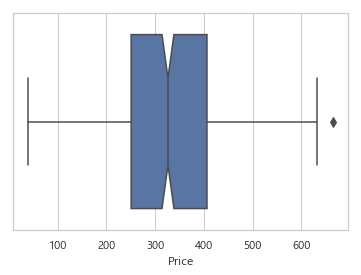

In [109]:
sns.boxplot(x="Price", data=df, orient="h", fliersize=7.5, notch=True, whis=1.5)

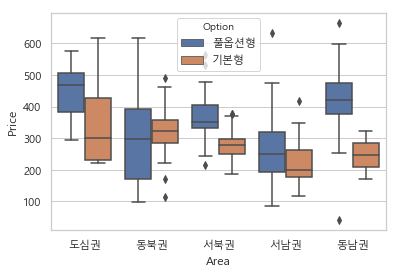

In [110]:
sns.boxplot(x="Area", y="Price", hue="Option", data=df)

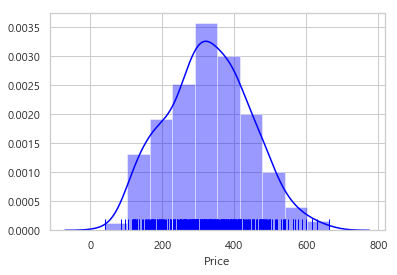

In [111]:
sns.distplot(df.Price, bins=10, hist=True, kde=True, rug=True, vertical=False, color="blue")

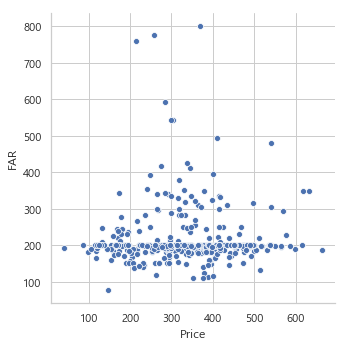

In [112]:
sns.relplot(x="Price", y="FAR", data=df, kind="scatter")

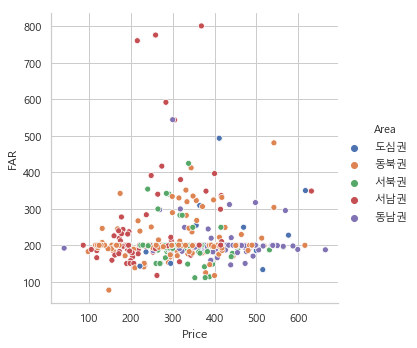

In [113]:
sns.relplot(x="Price", y="FAR", hue="Area", data=df, kind="scatter")

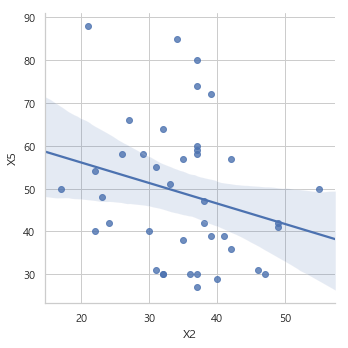

In [115]:
sns.lmplot(x="X2", y="X5", data=df1)

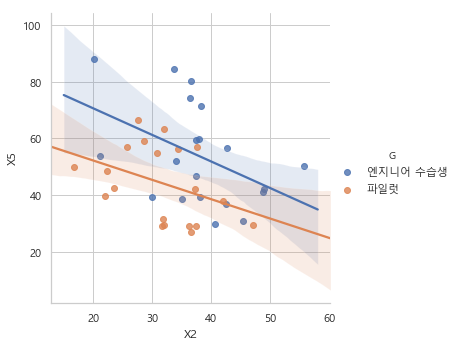

In [116]:
sns.lmplot(x="X2", y="X5", hue="G", data=df1, x_jitter=True, y_jitter=True)

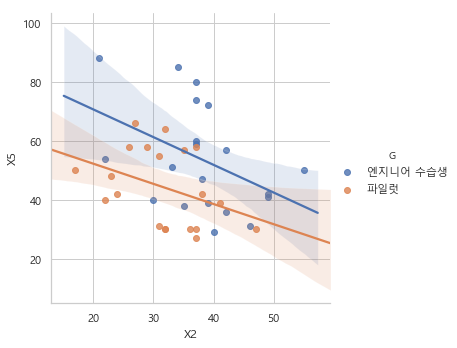

In [117]:
sns.lmplot(x="X2", y="X5", hue="G", data=df1, x_jitter=False, y_jitter=False)

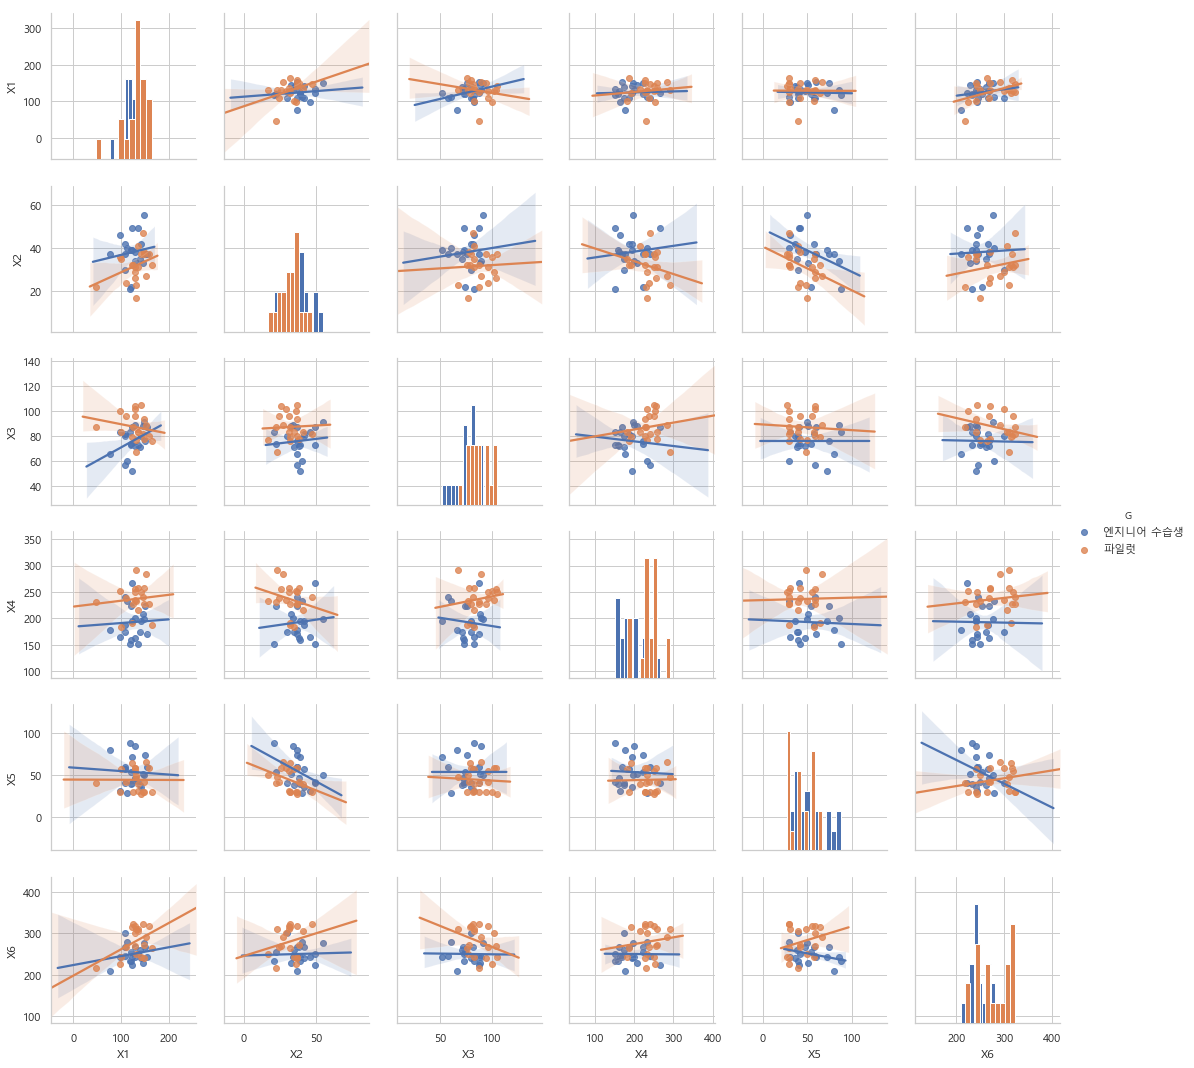

In [119]:
sns.pairplot(data=df1, hue="G", kind="reg", diag_kind="hist")

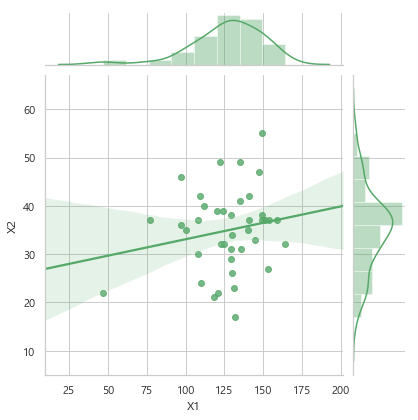

In [120]:
sns.jointplot(x="X1", y="X2", data=df1, kind="reg", color="g")

Plotly

In [123]:
import plotly as ply
import plotly.graph_objs as go

df.head(5)

,id,Area,UseDistrict,Option,FAR,Price
0,apt01,도심권,제2종 일반주거지역,풀옵션형,132.72,515.051949
1,apt02,도심권,제2종 일반주거지역,풀옵션형,184.99,499.500499
2,apt03,도심권,상업지역,기본형,308.81,364.319535
3,apt04,도심권,상업지역,풀옵션형,493.08,410.945530
4,apt05,도심권,준주거지역,기본형,349.65,616.975986


In [126]:
data = [go.Pie(text=area_tbi.index, values=area_tbi.values, opacity=0.7)]
layout = go.Layout(title="원그래프")
figure = go.Figure(data=data, layout=layout)
ply.offline.plot(figure, filename="lecture_data/piechart.html")

'lecture_data/piechart.html'

In [127]:
data = [go.Bar(x=area_tbi.index, y=area_tbi.values, opacity=0.7)]
layout = go.Layout(title="막대그래프")
figure = go.Figure(data=data, layout=layout)
ply.offline.plot(figure, filename="lecture_data/barchart.html")

'lecture_data/barchart.html'

In [129]:
data = [go.Box(x=df.Area, y=df.Price, boxmean=True, fillcolor="yellow", jitter=True, notched=True)]
layout = go.Layout(title="상자그래프")
figure = go.Figure(data=data, layout=layout)
ply.offline.plot(figure, filename="lecture_data/boxplot.html")

'lecture_data/boxplot.html'

In [130]:
data = [go.Histogram(x=df.Price, nbinsx=15, opacity=0.5, text="개")]
layout = go.Layout(title="히스토그램")
figure = go.Figure(data=data, layout=layout)
ply.offline.plot(figure, filename="lecture_data/histogram.html")

'lecture_data/histogram.html'

In [132]:
data = [go.Scatter(x=df.Price, y=df.FAR, mode="lines+markers")]
layout = go.Layout(title="산점도")
figure = go.Figure(data=data, layout=layout)
ply.offline.plot(figure, filename="lecture_data/scatter.html")

'lecture_data/scatter.html'

Bokeh

In [134]:
from bokeh.plotting import figure, output_file, output_notebook, show
area_tbi

동북권    140
동남권     92
서북권     81
서남권     76
도심권     11
Name: Area, dtype: int64

In [135]:
output_notebook()

p = figure(title="막대그래프", x_axis_label="x", y_axis_label="y")
p.hbar(y=[1, 2, 3, 4, 5], height=0.5, right=area_tbi.values)
show(p)

Loading BokehJS ...